## Preperations

In [58]:
#Importing the important libraries
import pandas as pd
import geopandas as gp
import folium
from shapely import Polygon
import contextily as cx

In [3]:
# Readin POI Data
df = pd.read_pickle("data/poi/poi_prepared.pickle")

In [11]:
# Building a Series all hexcodes and their polygons
hex_series_9 = pd.Series(df['pol_9'].drop_duplicates().values, index=df['hex_9'].drop_duplicates().values)
hex_series_8 = pd.Series(df['pol_8'].drop_duplicates().values, index=df['hex_8'].drop_duplicates().values)
hex_series_7 = pd.Series(df['pol_7'].drop_duplicates().values, index=df['hex_7'].drop_duplicates().values)

In [12]:
# Creating Counts for the Categories
grouped_DF_9 = pd.DataFrame(df.groupby(["hex_9", "category"]).count()["hex_8"]).reset_index().set_index("hex_9").rename(columns = {"hex_8": "count"})
grouped_DF_8 = pd.DataFrame(df.groupby(["hex_8", "category"]).count()["hex_7"]).reset_index().set_index("hex_8").rename(columns = {"hex_7": "count"})
grouped_DF_7 = pd.DataFrame(df.groupby(["hex_7", "category"]).count()["hex_9"]).reset_index().set_index("hex_7").rename(columns = {"hex_9": "count"})

In [138]:
# Method that returs a Geodataframe with all Hexagons and the amount of a certain category of POIs that are in the hexagon
def countGDF(resolution, category, fillzeros):
    if (resolution == 9):
        df = grouped_DF_9
        series = hex_series_9
    elif (resolution == 8):
        df = grouped_DF_8
        series = hex_series_8
    else:
        df = grouped_DF_7
        series = hex_series_7
    df = df[df["category"] == category]
    df = df.join(series.to_frame(), how="right").rename(columns={0: "geometry"})
    if fillzeros:
        df['count'] =  df['count'].fillna(0)
    #df['category'] =  df['category'].fillna("placeholder")
    return gp.GeoDataFrame(df, geometry='geometry', crs = "EPSG:4326")

In [146]:
# Method to plotting the count a a certain category in a certain hexagon with Folium
def plotCountFolium(resolution, category):
    # Creating a fitting geoJson for plotting with Folium
    gdf = countGDF(resolution, category, True)
    gdf.index.name = None
    gdf = gdf.reset_index()
    gjson = gdf.to_json()

    # Plotting with Folium
    m = folium.Map([41.88065, -87.62642], zoom_start=10,width=700,height=700)
    folium.Choropleth(
            geo_data=gdf,
            name="choropleth",
            data=gdf,
            columns=["index", "count"],  #Here we tell folium to get the county fips and plot new_cases_7days metric for each county
            key_on='feature.properties.index', #Here we grab the geometries/county boundaries from the geojson file using the key 'coty_code' which is the same as county fips
            fill_opacity=0.7,
            line_opacity=0.2,
            fill_color="YlGn",
            legend_name="Amount of " + category + "", #title of the legend
            line_color='black').add_to(m)
    return m

In [131]:
# Method to plotting the count a a certain category in a certain hexagon with geopandas and contextily
def plotCountMPL(resolution, category):
    gdf = countGDF(resolution, category, True)
    ax= gdf.plot(figsize=(5, 5), column='count', cmap='summer', legend=True)
    cx.add_basemap(ax, crs=gdf.crs.to_string(), source = cx.providers.Stamen.Terrain)
    ax.axis('off')
    return ax.plot()

## Descriptive Analysis

There are these categories:

In [148]:
print(df.groupby("category").count()["geometry"].sort_values(ascending=False).to_string())

category
public_transport          16443
parking                    6841
gastronomy                 5281
other                      2952
place_of_worship           1881
education                  1437
bicycle_parking             835
bicycle_rental              815
finance                     590
health                      486
fuel                        418
culture                     177
water_transport             166
children                     52
police                       38
nightlife                    24
car_rental                   24
bicycle_repair_station       19
taxi                         10
car_sharing                   2
sports                        2


Lets have a look at some that might give us an insight about how the city of Chicago is structured.
### Public Transport

In [152]:
plotCountFolium(7, "public_transport")

[]

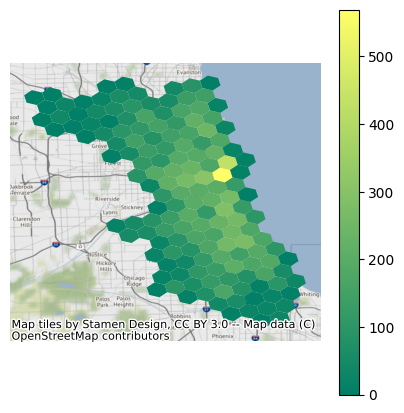

In [153]:
plotCountMPL(7, "public_transport")

### Parking

In [155]:
plotCountFolium(7, "public_transport")

### Gastronomy

In [159]:
plotCountFolium(7, "gastronomy")

In [174]:
#places = ["pub", "cafe", "restaurant"]
places = ["pub"]
testDF = df[df["amenity"].isin(places)]
m = plotCountFolium(7, "gastronomy")
for index, row in testDF.iterrows():
    if row["amenity"] == "cafe":
        folium.Marker(location=(row["latitude"],row["longitude"]) , icon=folium.Icon(icon="mug-saucer", prefix='fa',color = "pink")).add_to(m)
    elif row["amenity"] == "restaurant":
        folium.Marker(location=(row["latitude"],row["longitude"]), icon=folium.Icon(icon="utensils", prefix='fa',color = "green")).add_to(m)
    else:
        folium.Marker(location=(row["latitude"],row["longitude"]), icon=folium.Icon(icon="beer", prefix='fa',color = "orange")).add_to(m)

m

In [173]:
#places = ["pub", "cafe", "restaurant"]
places = ["cafe"]
testDF = df[df["amenity"].isin(places)]
m = plotCountFolium(7, "gastronomy")
for index, row in testDF.iterrows():
    if row["amenity"] == "cafe":
        folium.Marker(location=(row["latitude"],row["longitude"]) , icon=folium.Icon(icon="mug-saucer", prefix='fa',color = "pink")).add_to(m)
    elif row["amenity"] == "restaurant":
        folium.Marker(location=(row["latitude"],row["longitude"]), icon=folium.Icon(icon="utensils", prefix='fa',color = "green")).add_to(m)
    else:
        folium.Marker(location=(row["latitude"],row["longitude"]), icon=folium.Icon(icon="beer", prefix='fa',color = "orange")).add_to(m)

m

In [176]:
#places = ["pub", "cafe", "restaurant"]
places = ["restaurant"]
testDF = df[df["amenity"].isin(places)]
m = plotCountFolium(7, "gastronomy")
for index, row in testDF.iterrows():
    if row["amenity"] == "cafe":
        folium.Marker(location=(row["latitude"],row["longitude"]) , icon=folium.Icon(icon="mug-saucer", prefix='fa',color = "pink")).add_to(m)
    elif row["amenity"] == "restaurant":
        folium.Marker(location=(row["latitude"],row["longitude"]), icon=folium.Icon(icon="utensils", prefix='fa',color = "green")).add_to(m)
    else:
        folium.Marker(location=(row["latitude"],row["longitude"]), icon=folium.Icon(icon="beer", prefix='fa',color = "orange")).add_to(m)

m

### Health 

In [160]:
plotCountFolium(7, "health")

### Culture 

In [161]:
plotCountFolium(7, "culture")

### Nightlife 

In [162]:
plotCountFolium(7, "nightlife")